In [1]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import scipy.integrate
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc ## desnecessário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 18})

In [2]:
#Discret tempo
Tmax = 400
N = 4000

In [3]:
#Populações Iniciais
def init():
    
    #recurso difunde
    if d_r > 0:
    
        b10 = 1.0
        a10 = 1.0
        a20 = 1.0
        return b10, a10, a20
    
        #recurso não difunde
    elif d_r == 0:
    
        b10 = 2.0
        b20 = 0.0
        a10 = 1.0
        a20 = 1.0
        
        return b10, b20, a10, a20 

In [4]:
#lado direito das edos
def ddt(y, t):
    
    #recurso difunde
    if d_r > 0:
        
        B1 = y[0]
        A1 = y[1]
        A2 = y[2]
    
        dB1dt = 4*mu/np.pi - B1*(phi + 8*(A1+A2)/(3*np.pi) + d_r)
        dA1dt = A1*(8*B1/(3*np.pi) - 1 - alpha*8*A2/(3*np.pi) - d_1)
        dA2dt = A2*(8*m*gamma*B1/(3*np.pi) - m + 8*beta*alpha*A1/(3*np.pi) - d_2)
        
        return np.r_[dB1dt,dA1dt,dA2dt]
        
    #recurso não difunde
    
    elif d_r == 0:
        
        B1 = y[0]
        B2 = y[1]
        A1 = y[2]
        A2 = y[3]
        
        dB1dt = mu - phi*B1 - (32 - 3*np.pi**2)*(A1 + A2)*B2/(6*np.pi**2 - 48)
        dB2dt = - phi*B2 + (A1 + A2)*(B1 - B2*4*np.pi/(6*np.pi**2 - 48))
        dA1dt = A1*(B1 - (1 + d_1) - 8*B2/(3*np.pi) - alpha*8*A2/(3*np.pi))
        dA2dt = A2*(m*gamma*(B1 - 8*B2/(3*np.pi)) - (m + d_2) + alpha*8*beta*A1/(3*np.pi))
    
    
        return np.r_[dB1dt,dB2dt,dA1dt,dA2dt]

In [5]:
#Funções que calculam os mu_i
def mu_1():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return 3*(np.pi**2)*(phi+d_r)*(1+d_1)/32
    elif d_r == 0:
        return phi*(1+d_1)

def mu_2():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m + d_2 - m*gamma*(1+d_1))*(1+d_1)/(32*beta*alpha) + (3*np.pi**2)*(phi+d_r)*(1+d_1)/32
        #return (3*np.pi**2)*(1 + d_1)*(d_2 + m + beta*alpha*(phi + d_r) - m*gamma*(1+d_1))/(32*beta*alpha)

def mu_3():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m + d_2)*((m+d_2)/(m*gamma) - 1 - d_1)/(32*m*gamma*alpha) + (3*np.pi**2)*(m + d_2)*(phi+d_r)/(32*m*gamma)

In [21]:
#Integre aqui
d_r = 0
d_1 = 5
d_2 = 5
mu = 30
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
t = np.linspace(0,Tmax,N)
#pop inicial
if d_r > 0:
    B10,A10,A20 = init()
    y0 = np.r_[B10,A10,A20]
    
elif d_r == 0:
    B10,B20,A10,A20 = init()
    y0 = np.r_[B10,B20,A10,A20]
    
sol = scipy.integrate.odeint(ddt,y0,t)
sol = np.array(sol)

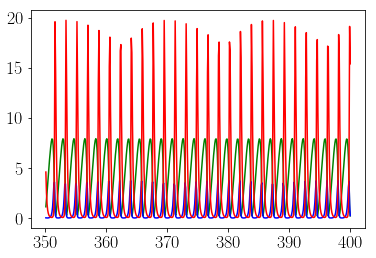

In [20]:
DR = 0.0
D1 = 1.0
D2 = 5.0
l = 0.5 + 30*0.0125
alpha = 1.0
beta = 8
gamma = 0.5
phi = 1.0
mu = 15

sol = np.load('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
        % (l,DR,D1,D2,mu,gamma,beta))
if DR > 0:
    B1B2 = sol[:,0]
    A1 = sol[:,1]
    A2 = sol[:,2]
    plt.plot(t[-500:],B1B2[-500:], color = 'green')
    plt.plot(t[-500:],A1[-500:], color = 'blue')
    plt.plot(t[-500:],A2[-500:], color = 'red')
    #plt.axis([0,Tmax,0,20])
            
if DR == 0:
    B1 = sol[:,0]
    B2 = sol[:,1]            
    A1 = sol[:,2]
    A2 = sol[:,3]
    plt.plot(t[-500:],B1[-500:] - B2[-500:], color = 'green')
    plt.plot(t[-500:],A1[-500:], color = 'blue')
    plt.plot(t[-500:],A2[-500:], color = 'red')
    #plt.axis([0,Tmax,0,20])

In [18]:
#Faça para vários dR, d1, d2
DR = [0]
D1 = [7]
D2 = [3]
MU = [0.0 + i for i in range(0,140)]
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
#pop inicial
for d_r in DR:
    print("d_r = " + str(d_r))
    for d_1 in D1:
        print("d_1 = " + str(d_1))
        for d_2 in D2:
            print("d_2 = " + str(d_2))
            for mu in MU:
                print("mu = " + str(mu))
                B10,B20,A10,A20 = init()
                y0 = np.r_[B10,B20,A10,A20]
                sol = scipy.integrate.odeint(ddt,y0,t)
                sol = np.array(sol)
                np.save('Var_Method_IGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f'
                        % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m),sol)

d_r = 0
d_1 = 7
d_2 = 3
mu = 0.0
mu = 1.0
mu = 2.0
mu = 3.0
mu = 4.0
mu = 5.0
mu = 6.0
mu = 7.0
mu = 8.0
mu = 9.0
mu = 10.0
mu = 11.0
mu = 12.0
mu = 13.0
mu = 14.0
mu = 15.0
mu = 16.0
mu = 17.0
mu = 18.0
mu = 19.0
mu = 20.0
mu = 21.0
mu = 22.0
mu = 23.0
mu = 24.0
mu = 25.0
mu = 26.0
mu = 27.0
mu = 28.0
mu = 29.0
mu = 30.0
mu = 31.0
mu = 32.0
mu = 33.0
mu = 34.0
mu = 35.0
mu = 36.0
mu = 37.0
mu = 38.0
mu = 39.0
mu = 40.0
mu = 41.0
mu = 42.0
mu = 43.0
mu = 44.0
mu = 45.0
mu = 46.0
mu = 47.0
mu = 48.0
mu = 49.0
mu = 50.0
mu = 51.0
mu = 52.0
mu = 53.0
mu = 54.0
mu = 55.0
mu = 56.0
mu = 57.0
mu = 58.0
mu = 59.0
mu = 60.0
mu = 61.0
mu = 62.0
mu = 63.0
mu = 64.0
mu = 65.0
mu = 66.0
mu = 67.0
mu = 68.0
mu = 69.0
mu = 70.0
mu = 71.0
mu = 72.0
mu = 73.0
mu = 74.0
mu = 75.0
mu = 76.0
mu = 77.0
mu = 78.0
mu = 79.0
mu = 80.0
mu = 81.0
mu = 82.0
mu = 83.0
mu = 84.0
mu = 85.0
mu = 86.0
mu = 87.0
mu = 88.0
mu = 89.0
mu = 90.0
mu = 91.0
mu = 92.0
mu = 93.0
mu = 94.0
mu = 95.0
mu = 96.0
mu = 97.0
mu = 9

[0, 140, 0, 20]

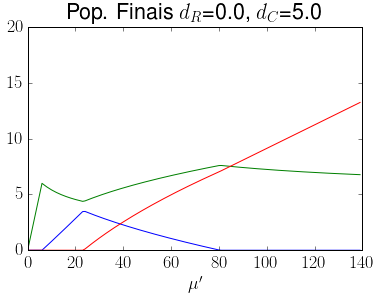

In [21]:
#Imprima a população final
DR = [0]
D1 = [5]
D2 = [5]
MU = [0.0 + i for i in range(0,140)]
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0

Bfinal = []
A1final = []
A2final = []
t = np.linspace(0,Tmax,N)
for d_r in DR:
    for d_1 in D1:
        for d_2 in D2:
            for mu in MU:
                sol = np.load('Var_Method_IGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.npy'
                              % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))
                B1 = np.transpose(sol[:,0])
                B2 = np.transpose(sol[:,1])
                A1 = np.transpose(sol[:,2])
                A2 = np.transpose(sol[:,3])
                Bfinal.append(B1[-1] - B2[-1])
                A1final.append(A1[-1])
                A2final.append(A2[-1])

plt.plot(MU,Bfinal, color = 'green', label = r'$B_1 - B_2$')
plt.plot(MU,A1final,color = 'blue', label = r'$A_1$')
plt.plot(MU,A2final,color = 'red', label = r'$A_2$')
plt.xlabel(r"$\mu'$")
#plt.legend(loc = 'best')
plt.title(r'Pop. Finais $d_R$=%.1f, $d_C$=%.1f' % (d_r,d_1))
plt.axis([0,140,0,20])

In [174]:
d_r = 5
d_1 = 12
d_2 = 5
print(mu_1(),mu_2(),mu_3())

(72.17148218296593, 66.15719200105211, 55.51652475612765)


In [12]:
#Oscilações x L
#Gera os dados para fazer o gráfico L x mu
#L' = sqrt(m1)*(L/pi)
Nl = 100
L = [0.5 + 0.0125*j for j in range(0,Nl)]
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,0.0]]

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
        d_2 = D2/(l**2)
        d_r = DR/(l**2)
        
        if d_r > 0:
            B10,A10,A20 = init()
            y0 = np.r_[B10,A10,A20] #d_r > 0
        
        if d_r == 0:
            B10,B20,A10,A20 = init()
            y0 = np.r_[B10,B20,A10,A20] #d_r = 0
        
        sol = scipy.integrate.odeint(ddt,y0,t)
        sol = np.array(sol)
        np.save('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f'
                % (l,DR,D1,D2,mu,gamma,beta),sol)

D = [1.0, 5.0, 0.0]


D = [1.0, 5.0, 0.0]


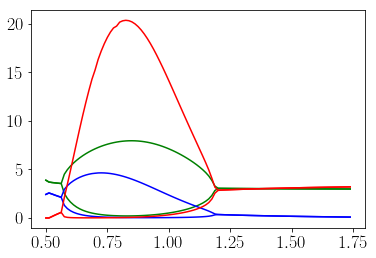

In [14]:
#Leia os dados e gere o gráfico Pop x L
Nl = 100
L = [0.5 + 0.0125*j for j in range(0,Nl)]
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,0.0]]

B1B2MAX = []
B1B2MIN = []
A1MAX = []
A1MIN = []
A2MAX = []
A2MIN = []

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        sol = np.load('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta))
        if DR > 0:
            B1B2 = sol[:,0]
            A1 = sol[:,1]
            A2 = sol[:,2]
            B1B2MAX.append(np.max(B1B2[-500:]))
            B1B2MIN.append(np.min(B1B2[-500:]))
            A1MAX.append(np.max(A1[-500:]))
            A1MIN.append(np.min(A1[-500:]))
            A2MAX.append(np.max(A2[-500:]))
            A2MIN.append(np.min(A2[-500:]))
            
        if DR == 0:
            B1 = sol[:,0]
            B2 = sol[:,1]            
            A1 = sol[:,2]
            A2 = sol[:,3]
            B1B2MAX.append(np.max(B1[-1000:]-B2[-1000:]))
            B1B2MIN.append(np.min(B1[-1000:]-B2[-1000:]))
            A1MAX.append(np.max(A1[-1000:]))
            A1MIN.append(np.min(A1[-1000:]))
            A2MAX.append(np.max(A2[-1000:]))
            A2MIN.append(np.min(A2[-1000:]))

plt.plot(L,B1B2MAX,color = 'green')
plt.plot(L,B1B2MIN,color = 'green')
plt.plot(L,A1MAX,color = 'blue')
plt.plot(L,A1MIN,color = 'blue')
plt.plot(L,A2MAX,color = 'red')
plt.plot(L,A2MIN,color = 'red')